#EDA 1

In [ ]:
#1. What is the range of selling prices in the dataset?

import pandas as pd
data = pd.read_csv("Bike details.csv")
data.head()

min_price = data['selling_price'].min()
max_price = data['selling_price'].max()

print("Range of Selling Prices: ₹", min_price, "to ₹", max_price)

Range of Selling Prices: ₹ 5000 to ₹ 760000


In [ ]:
#2. What is the median selling price for bikes in the dataset?

median_price = data['selling_price'].median()
print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


In [ ]:
#3. What is the most common seller type?

common_seller_type = data['seller_type'].mode()[0]
print("Most Common Seller Type:", common_seller_type)

Most Common Seller Type: Individual


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?

count_over_50000 = data[data['km_driven'] > 50000].shape[0]
print("Bikes driven more than 50,000 km:", count_over_50000)

Bikes driven more than 50,000 km: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?

average_km_by_owner = data.groupby('owner')['km_driven'].mean()
print("Average km_driven by each ownership type:\n", average_km_by_owner)

Average km_driven by each ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?

bikes_2015_or_older = data[data['year'] <= 2015].shape[0]
total_bikes = data.shape[0]
proportion = bikes_2015_or_older / total_bikes

print("Proportion of bikes from 2015 or older:", proportion)

Proportion of bikes from 2015 or older: 0.5664467483506126


In [ ]:
#7. What is the trend of missing values across the dataset?

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

max_price_row = data.loc[data['ex_showroom_price'].idxmax()]

print("Highest ex_showroom_price:", max_price_row['ex_showroom_price'])
print("Bike with highest ex_showroom_price:", max_price_row['name'])

Highest ex_showroom_price: 1278000.0
Bike with highest ex_showroom_price: Harley-Davidson Street Bob


In [ ]:
#9. What is the total number of bikes listed by each seller type?

bikes_by_seller_type = data['seller_type'].value_counts()
print("Total number of bikes by each seller type:\n", bikes_by_seller_type)

Total number of bikes by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


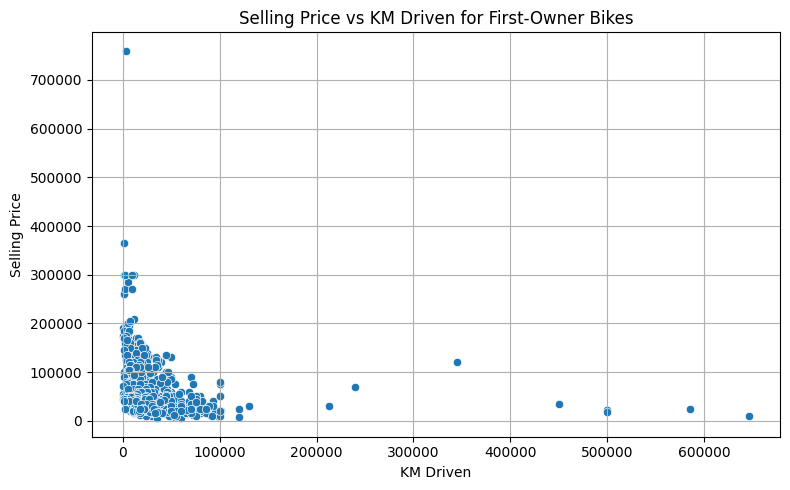

In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

import matplotlib.pyplot as plt
import seaborn as sns

first_owner_bikes = data[data['owner'] == '1st owner']

plt.figure(figsize=(8, 5))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs KM Driven for First-Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]

print("Original data shape:", data.shape)
print("Data shape after removing outliers:", data_no_outliers.shape)

Original data shape: (1061, 7)
Data shape after removing outliers: (1022, 7)


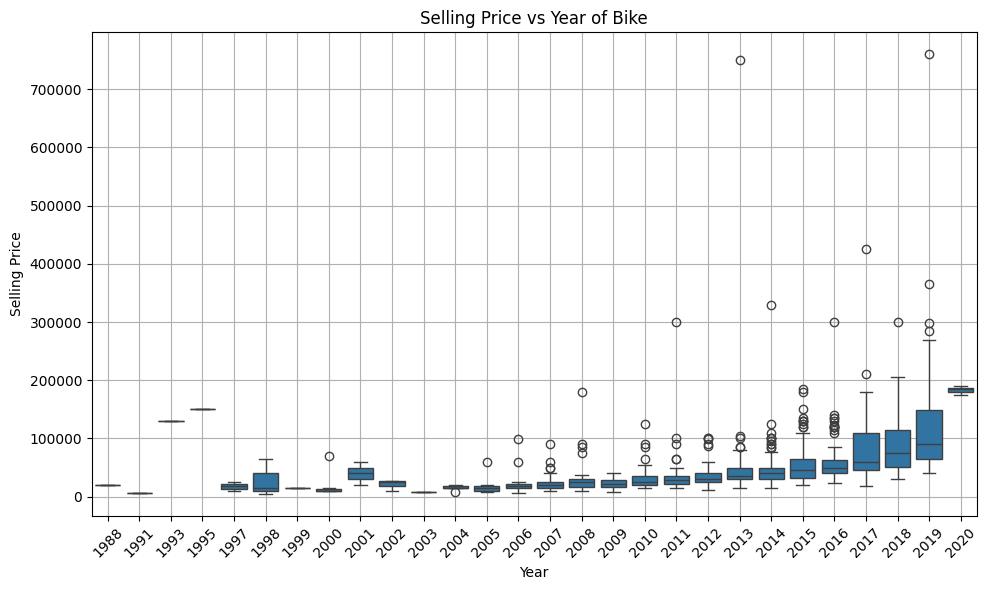

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=data)
plt.title('Selling Price vs Year of Bike')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
data['bike_age'] = current_year - data['year']

avg_depreciation = data.groupby('bike_age')['selling_price'].mean().reset_index()

print("Average selling price based on bike age:\n", avg_depreciation)

Average selling price based on bike age:
     bike_age  selling_price
0          5  183333.333333
1          6  119689.511628
2          7   87660.374046
3          8   78894.736842
4          9   58469.018692
5         10   56500.000000
6         11   48668.131868
7         12   51136.986301
8         13   35748.400000
9         14   35655.721311
10        15   31793.333333
11        16   22267.857143
12        17   34289.285714
13        18   24927.586207
14        19   23380.000000
15        20   16978.571429
16        21   15100.000000
17        22    8000.000000
18        23   20666.666667
19        24   40000.000000
20        25   20833.333333
21        26   15000.000000
22        27   28333.333333
23        28   17500.000000
24        30  150000.000000
25        32  130000.000000
26        34    6000.000000
27        37   20000.000000


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

year_avg_price = data.groupby('year')['selling_price'].mean().reset_index()
year_avg_price.columns = ['year', 'avg_price']

merged_data = pd.merge(data, year_avg_price, on='year')
above_avg_bikes = merged_data[merged_data['selling_price'] > 1.5 * merged_data['avg_price']]

print("Bikes priced significantly above average for their year:\n", above_avg_bikes[['name', 'year', 'selling_price']])

Bikes priced significantly above average for their year:
                                      name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


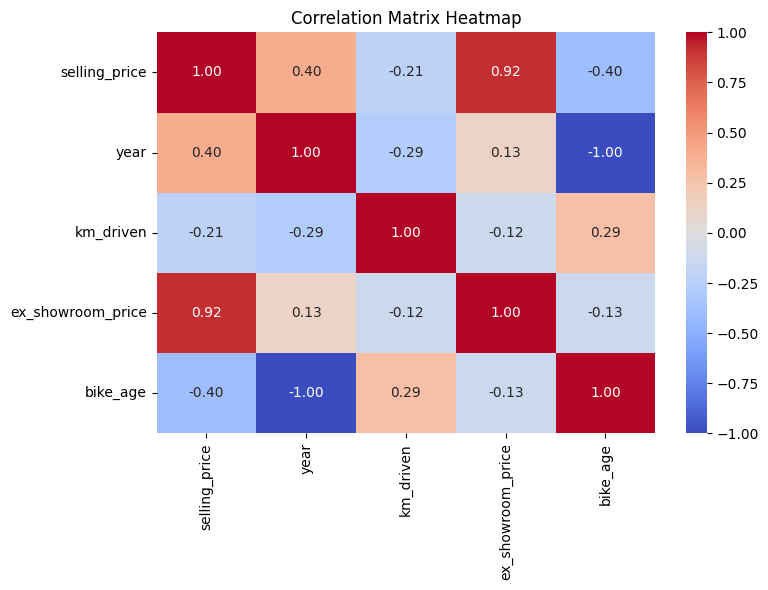

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# EDA 2

In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

import pandas as pd
data = pd.read_csv("Car Sale.csv")

avg_price_by_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
avg_price_by_dealer = avg_price_by_dealer.sort_values(by='Price ($)', ascending=False)

print(avg_price_by_dealer)

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation = data.groupby("Company")["Price ($)"].std()

max_variation_brand = price_variation.idxmax()
max_variation_value = price_variation.max()

print("Car brand with highest price variation:", max_variation_brand)
print("Standard deviation in price:", max_variation_value)


Car brand with highest price variation: Lincoln
Standard deviation in price: 19658.050211265567


In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

transmission_groups = data.groupby("Transmission")["Price ($)"]

iqr_comparison = transmission_groups.quantile(0.75) - transmission_groups.quantile(0.25)

print("Interquartile Range (IQR) of Car Prices by Transmission Type:")
print(iqr_comparison)


Interquartile Range (IQR) of Car Prices by Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [ ]:
#4. What is the distribution of car prices across different regions?

price_distribution = data.groupby("Dealer_Region")["Price ($)"].describe()
print(price_distribution)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [ ]:
#5. What is the distribution of cars based on body styles?

body_style_distribution = data['Body Style'].value_counts()

print("Distribution of Cars by Body Style:")
print(body_style_distribution)

Distribution of Cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?

avg_price = data.groupby(["Gender", "Annual Income"])["Price ($)"].mean()

print("Average Selling Price by Gender and Annual Income:")
print(avg_price)

Average Selling Price by Gender and Annual Income:
Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

price_stats = data.groupby("Dealer_Region")["Price ($)"].describe()

cars_sold = data["Dealer_Region"].value_counts()

print("Car Price Distribution by Region:")
print(price_stats)

print("\nNumber of Cars Sold by Region:")
print(cars_sold)

Car Price Distribution by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          3

In [ ]:
#8. How does the average car price differ between cars with different engine sizes?

avg_price_by_engine = data.groupby("Engine")["Price ($)"].mean().sort_values()

print("Average Car Price by Engine Size:")
print(avg_price_by_engine)

Average Car Price by Engine Size:
Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64


In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?

avg_price_by_income = data.groupby("Annual Income")["Price ($)"].mean().sort_index()

print("Average Car Price by Annual Income Bracket:")
print(avg_price_by_income)

Average Car Price by Annual Income Bracket:
Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_models = data['Model'].value_counts().head(5)
print("Top 5 Car Models by Number of Sales:")
print(top_models)

top_model_prices = data[data["Model"].isin(top_models.index)]

price_distribution = top_model_prices.groupby('Model')["Price ($)"].describe()
print("\nPrice Distribution for Top 5 Car Models:")
print(price_distribution)

Top 5 Car Models by Number of Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

Price Distribution for Top 5 Car Models:
            count          mean           std      min      25%      50%  \
Model                                                                      
Diamante    418.0  22268.303828   9770.768958  12000.0  18000.0  19001.0   
Passat      391.0  19600.728900   8218.521683   9000.0  12001.0  20000.0   
Prizm       411.0  22838.457421   8012.531045  15000.0  16000.0  22000.0   
Ram Pickup  383.0  27820.864230  13297.609534  16000.0  19000.0  21000.0   
Silhouette  411.0  29858.513382  17940.571762  12000.0  14001.0  25000.0   

                75%      max  
Model                         
Diamante    22000.0  49801.0  
Passat      27001.0  32501.0  
Prizm       25000.0  44700.0  
Ram Pickup  39300.0  57750.0  
Silhouette  34500.0  60750.0  


In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

price_by_color_engine = data.groupby(["Color", "Engine"])["Price ($)"].mean()
print("Average Car Price by Color and Engine Size:")
print(price_by_color_engine)

price_variation_by_color = data.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print("\nCar Colors with Highest Price Variation:")
print(price_variation_by_color)

Average Car Price by Color and Engine Size:
Color       Engine                   
Black       DoubleÂ Overhead Camshaft    25766.451103
            Overhead Camshaft            31732.967164
Pale White  DoubleÂ Overhead Camshaft    30347.987460
            Overhead Camshaft            24327.767694
Red         DoubleÂ Overhead Camshaft    27434.392314
            Overhead Camshaft            30153.405229
Name: Price ($), dtype: float64

Car Colors with Highest Price Variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?

data['Date'] = pd.to_datetime(data['Date'])

data['Sale_Month'] = data['Date'].dt.month

monthly_sales = data['Sale_Month'].value_counts().sort_index()

print("Car Sales Per Month:")
print(monthly_sales)

Car Sales Per Month:
Sale_Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

price_distribution = data.groupby(["Body Style", "Transmission"])["Price ($)"].describe()

print("Car Price Distribution by Body Style and Transmission Type:")
print(price_distribution)

Car Price Distribution by Body Style and Transmission Type:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15

In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

print(data['Engine'].unique())

# Use only numeric columns
numeric_cols = ['Price ($)', 'Annual Income']

correlation_df = data[numeric_cols].dropna()

# Calculate correlation
correlation_matrix = correlation_df.corr().round(2)

print("Correlation Matrix:")
print(correlation_matrix)

['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
Correlation Matrix:
               Price ($)  Annual Income
Price ($)           1.00           0.01
Annual Income       0.01           1.00


In [ ]:
#15. How does the average car price vary across different car models and engine types?

avg_price_by_model_engine = data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
avg_price_by_model_engine = avg_price_by_model_engine.sort_values(by='Price ($)', ascending=False)
print(avg_price_by_model_engine.head(10))

           Model                     Engine     Price ($)
212           SC          Overhead Camshaft  61074.818182
198       Ranger  DoubleÂ Overhead Camshaft  61064.055556
222        Sable          Overhead Camshaft  61039.770833
56        Catera  DoubleÂ Overhead Camshaft  56836.933333
143        LX470          Overhead Camshaft  54037.490196
139        LS400          Overhead Camshaft  53157.941558
111        GS400          Overhead Camshaft  53086.000000
239       Tacoma  DoubleÂ Overhead Camshaft  53085.821918
25        Aurora          Overhead Camshaft  51833.556962
173  Park Avenue  DoubleÂ Overhead Camshaft  49387.750000


#EDA 3

In [6]:
#1. What is the average rating for each product category?

import pandas as pd
df = pd.read_csv("amazon.csv")

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

average_ratings = df.groupby('category')['rating'].mean()

print(average_ratings)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [ ]:
#2. What are the top rating_count products by category?

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

df_clean = data[['category', 'product_name', 'rating_count']].dropna()

top_products = df_clean.sort_values('rating_count', ascending=False).groupby('category').first()

print("Top Rating Count Products by Category:")
print(top_products)

Top Rating Count Products by Category:
                                                                                         product_name  \
category                                                                                                
Computers&Accessories|Accessories&Peripherals|C...  Lapster USB 3.0 sata Cable for 2.5 inch SSD an...   
Computers&Accessories|Accessories&Peripherals|C...  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
Computers&Accessories|Accessories&Peripherals|K...  Amazon Basics Magic Slate 8.5-inch LCD Writing...   
Computers&Accessories|Accessories&Peripherals|K...  STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...   
Computers&Accessories|Accessories&Peripherals|K...  HP 330 Wireless Black Keyboard and Mouse Set w...   
...                                                                                               ...   
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Clea...  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
Home&Kitchen|Kit

In [ ]:
#3. What is the distribution of discounted prices vs. actual prices?

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df_clean = df[['discounted_price', 'actual_price']].dropna()

print("Discounted Price Distribution:")
print(df_clean['discounted_price'].describe())

print("\nActual Price Distribution:")
print(df_clean['actual_price'].describe())

Discounted Price Distribution:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: discounted_price, dtype: float64

Actual Price Distribution:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: actual_price, dtype: float64


In [ ]:
#4. How does the average discount percentage vary across categories?

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df_clean = df[['category', 'actual_price', 'discounted_price']].dropna()

df_clean['discount_percent'] = ((df_clean['actual_price'] - df_clean['discounted_price']) / df_clean['actual_price']) * 100

avg_discount = df_clean.groupby('category')['discount_percent'].mean().sort_values(ascending=False)

print("Average Discount Percentage by Category:")
print(avg_discount)

Average Discount Percentage by Category:
Series([], Name: discount_percent, dtype: float64)


In [ ]:
#5. What are the most popular product names?

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

df_clean = df[['product_name', 'rating_count']].dropna()

popular_products = df_clean.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)

print("Most Popular Product Names:")
print(popular_products.head(10))

Most Popular Product Names:
product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/

In [8]:
#6. What are the most popular product keywords?

from collections import Counter
import re

text = ' '.join(df['product_name'].dropna().astype(str))

words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())

word_counts = Counter(words)

popular_keywords = word_counts.most_common(20)

for word, count in popular_keywords:
    print(f"{word}: {count}")

with: 752
for: 674
black: 530
usb: 417
cable: 414
and: 331
charging: 247
type: 243
fast: 212
smart: 175
white: 170
compatible: 146
data: 136
led: 129
pro: 125
wireless: 119
water: 114
remote: 109
heater: 108
bluetooth: 107


In [9]:
#7. What are the most popular product reviews?

reviews = df['review_id'].dropna().astype(str)

popular_reviews = reviews.value_counts().head(10)

print(popular_reviews)


review_id
R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,RDVX50PD4CTFE,R3H6WKG0TA5CGU,R3Q3L1KP5QWPV3,RU0LU2PAIIME,R20FTANBPFA653      10
R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I      8
R2K5OD0MEEBTDL,RS1N6TNO33BOK,R6KWBGOKI1N9Y,R30SKUMYLSXXDN,R1EOYHZWCRSV7B,R13JBDK4SAAYFT,RJOU5K9ECNW7Y,R2APPRANV6IERZ       8
RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6TO2CCA,R3PHKXYA5AFEOU      7
R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5U3,R2DMKIBGFKBD6R,RC89B5IAJUTR5,R3B3DDON5FH8DS,R13WAEJDI5RS36      7
R27MK332LTT5KS,R2TN6LNGD4FLYB,RVZJOLWLG5JZ9,R32Y3RXFGS0N8S,R1WG388SX6A8SS,R3FCO1GKVP9JHZ,REQQ0KOQUU7N5,RB48XNZD8P2Q4       6
R2A7MIUNOW8DOE,R2FXP703540FR1,R37E7QJET0BYE8,R1NOL0GE16P06G,R48EN3ANVWEX9,R17WYXS17TYDER,R2BMYAH01K8EG8,R23IO3LHHG39H      6
R1Q323BB35OP30,RJ0CSQUUWFF9W,R23OB4XMH3S9QD,R1K5FQR6CYMQAV,R3QMD6JDUGQUCI,R1R5LTMWOXI38M,R241G3F07D3OBH,R1O7BQ61DXR

In [13]:
#8. What is the correlation between discounted_price and rating?

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df = df.dropna(subset=['discounted_price', 'rating'])
correlation = df['discounted_price'].corr(df['rating'])

print("Correlation:", correlation)


Correlation: nan


In [16]:
#9. What are the Top 5 categories based on the highest ratings?

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

category_ratings = df.groupby('category')['rating'].mean()
top_5 = category_ratings.sort_values(ascending=False).head(5)

print(top_5)

Series([], Name: rating, dtype: float64)


In [19]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

df = df.dropna(subset=['rating', 'discounted_price', 'category'])

low_rated = df.groupby('category')['rating'].mean()
low_rated = low_rated[low_rated < 3]

low_quality_high_price = df[(df['rating'] < 3) & (df['discounted_price'] > df['discounted_price'].median())]

category_issue_count = df[df['rating'] < 3].groupby('category').size().sort_values(ascending=False)

print("Categories needing improvement (Avg Rating < 3):")
print(low_rated)

print("\nHigh price but low-rated products (Potential quality issues):")
print(low_quality_high_price[['product_name', 'rating', 'discounted_price']].head())

print("\nCategories with most low-rated reviews:")
print(category_issue_count.head())


Categories needing improvement (Avg Rating < 3):
Series([], Name: rating, dtype: float64)

High price but low-rated products (Potential quality issues):
Empty DataFrame
Columns: [product_name, rating, discounted_price]
Index: []

Categories with most low-rated reviews:
Series([], dtype: int64)


#EDA 4

In [20]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

import pandas as pd
df = pd.read_csv("spotify.csv")

print("Null values per column:")
print(df.isnull().sum())

df = df.dropna()

print("\nDuplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

print("\nCleaned DataFrame shape:", df.shape)

Null values per column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27

Cleaned DataFrame shape: (413, 5)


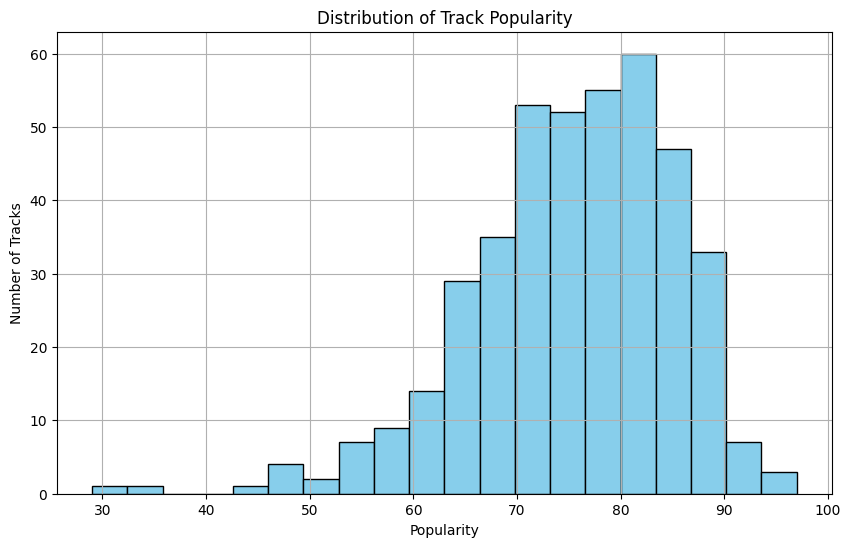

In [23]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import matplotlib.pyplot as plt

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

df = df.dropna(subset=['Popularity'])

plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

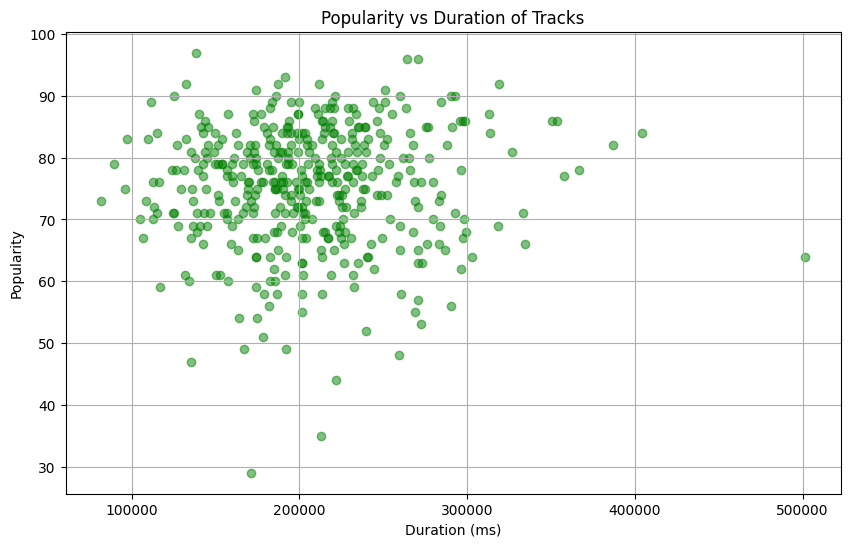

In [25]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

import matplotlib.pyplot as plt

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')

df = df.dropna(subset=['Popularity', 'Duration (ms)'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], alpha=0.5, color='green')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

<ipython-input-27-b2ed15e219a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')


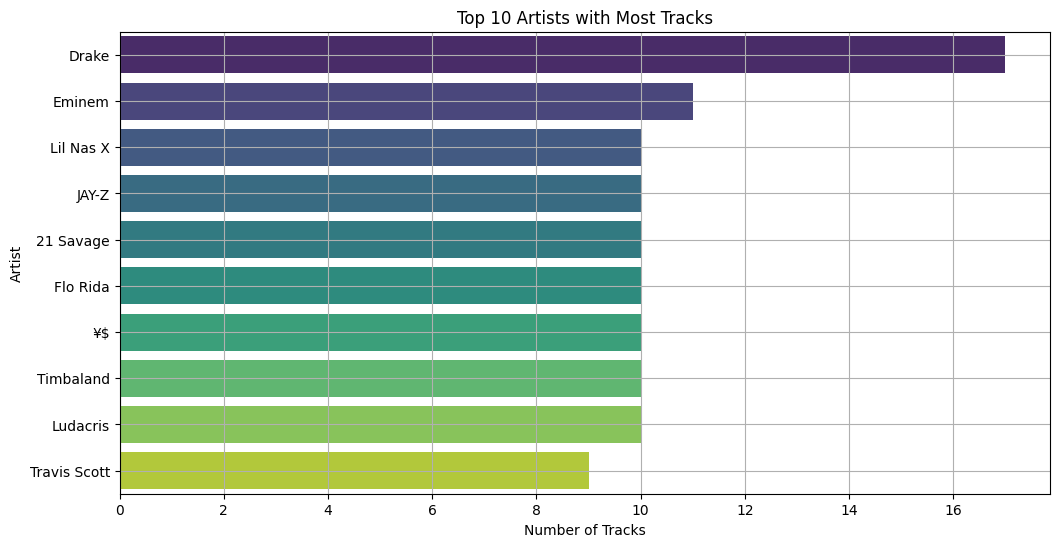

In [27]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

import seaborn as sns
import matplotlib.pyplot as plt

artist_counts = df['Artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.grid(True)
plt.show()

In [30]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

df = df.dropna(subset=['Popularity'])

least_popular = df.sort_values(by='Popularity').head(5)

print(least_popular[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [31]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

df = df.dropna(subset=['Popularity', 'Artist'])

top_artists = df['Artist'].value_counts().head(5).index

top_artist_data = df[df['Artist'].isin(top_artists)]

avg_popularity = top_artist_data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("Average Popularity of Top 5 Most Frequent Artists:")
print(avg_popularity)

Average Popularity of Top 5 Most Frequent Artists:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [34]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

df = df.dropna(subset=['Popularity', 'Artist', 'Track Name'])

top_artists = df['Artist'].value_counts().head(5).index

most_popular_tracks = []

for artist in top_artists:
    artist_tracks = df[df['Artist'] == artist]
    top_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append({
        'Artist': artist,
        'Track Name': top_track['Track Name'],
        'Popularity': top_track['Popularity']})

result_df = pd.DataFrame(most_popular_tracks)
print(result_df)

      Artist                               Track Name  Popularity
0      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
1     Eminem                               Without Me          90
2  Lil Nas X                        THATS WHAT I WANT          81
3      JAY-Z                          Ni**as In Paris          86
4  21 Savage                                   redrum          96


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


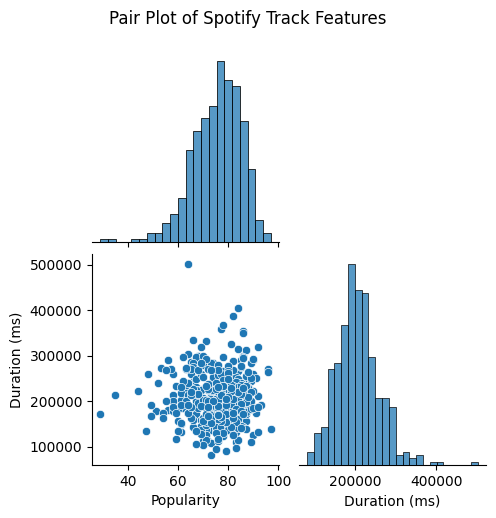

In [37]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)

cols = ['Popularity', 'Duration (ms)', 'danceability']
cols = [col for col in cols if col in df.columns]

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=cols)

sns.pairplot(df_clean[cols], corner=True)
plt.suptitle("Pair Plot of Spotify Track Features", y=1.02)
plt.show()

<ipython-input-38-49dfabd2e7fe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_df, x='Artist', y='Duration (ms)', palette='Set2')


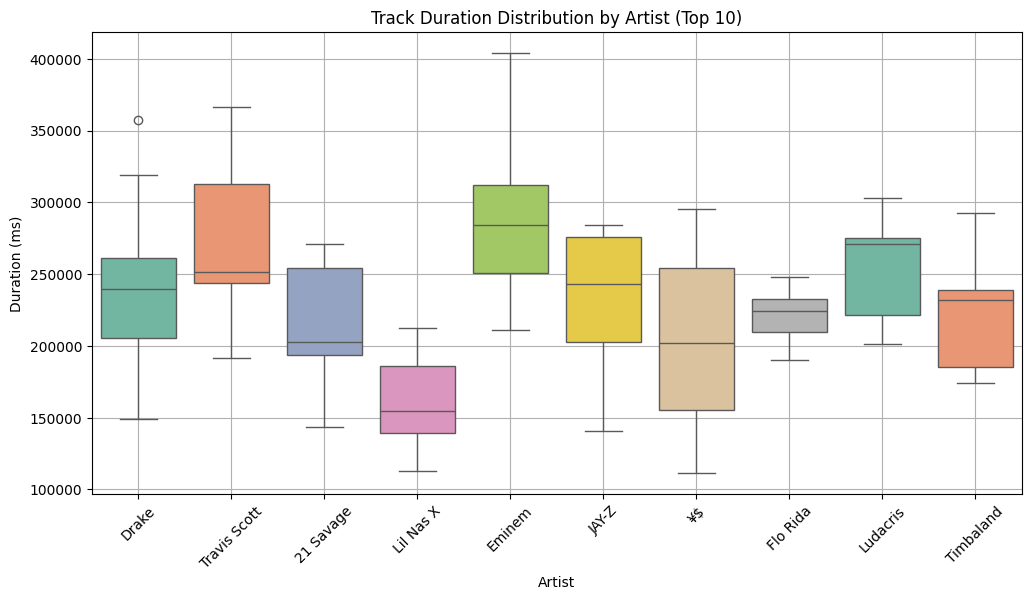

In [38]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

import seaborn as sns
import matplotlib.pyplot as plt

df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')

df = df.dropna(subset=['Duration (ms)', 'Artist'])

top_artists = df['Artist'].value_counts().head(10).index
top_df = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_df, x='Artist', y='Duration (ms)', palette='Set2')
plt.title("Track Duration Distribution by Artist (Top 10)")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-40-f82bc4c50c62>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_df, x='Artist', y='Popularity', palette='coolwarm')


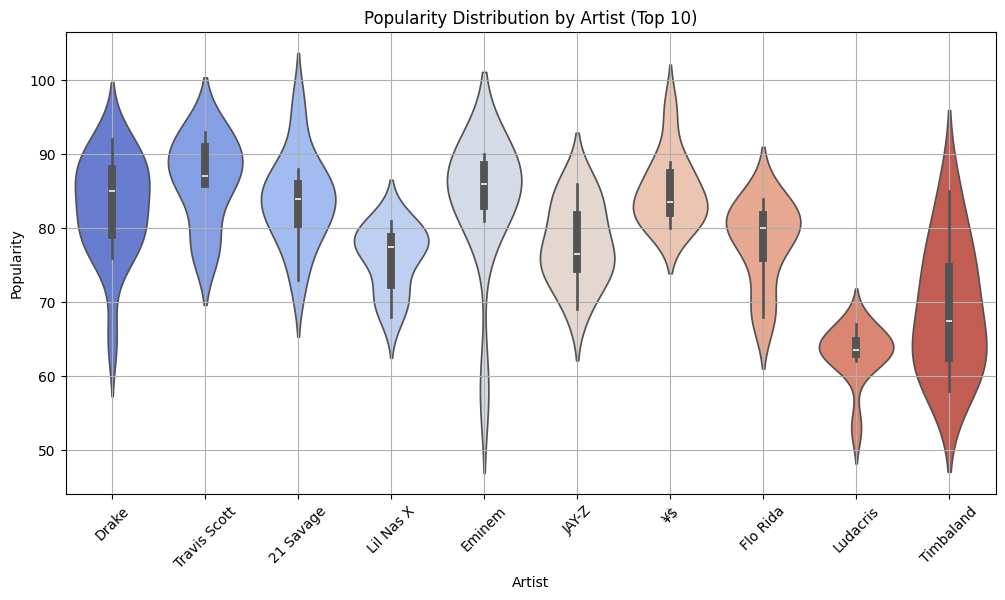

In [40]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

import seaborn as sns
import matplotlib.pyplot as plt

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

df = df.dropna(subset=['Popularity', 'Artist'])

top_artists = df['Artist'].value_counts().head(10).index
top_df = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=top_df, x='Artist', y='Popularity', palette='coolwarm')
plt.title("Popularity Distribution by Artist (Top 10)")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()